##                                        <center> Welcome! </center>

<p style="text-align:center;"><img src="https://images.unsplash.com/photo-1599490659213-e2b9527bd087?ixlib=rb4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"/ width="560"> </p> 


<p> In order to understand the types of customers who purchase chips and their purchasing behaviour within the region, we will make use of the customers and transactions datasets. Before beginning with the analysis,the first task is to ensure that the data is cleaned and consistency is ensured. </p>  <br/>

<p> The detailed tasks include : <br/></p>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:15px">Task 1:<b> Data Cleaning, Data Wrangling and Data Visualisation!</b> </div>
<ul>
    <li><b>Examine transaction data</b>: look for inconsistencies, missing data , outliers, correctly identified category                                         items,numeric data across all tables.</li>
    <li><b> Examine customer data:</b> check for similar issues, look for nulls. When you are happy merge the transaction                                              and customer data together so it’s ready for the analysis.</li>
    <li><b> Data analysis and customer segments:</b> define the metrics – look at total sales, drivers of sales, where the                                                         highest sales are coming from etc. Explore the data, create charts and                                                           graphs as well as noting any interesting trends and/or insights you                                                             find.These will all form part of our report to Julia.</li>
    <li><b> Deep dive into customer segments:</b> define your recommendation from your insights, determine which segments                                                      we should be targeting, if packet sizes are relative and form an overall                                                        conclusion based on your analysis. derive extra features such as pack size                                                      and brand name from the data and define metrics of interest to enable you                                                        to draw insights on who spends on chips and what drives spends for each                                                          customer segment</li>
    
</ul>
    </div>


## Loading libraries and importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [16]:
customer = pd.read_csv("QVI_purchase_behaviour.csv")
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [77]:
transaction = pd.read_excel("QVI_transaction_data.xlsx", parse_dates=["DATE"])
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


 ## Understanding the Data : Preparation and Cleaning  🧹✨
 
 ### Transaction Dataset



In [78]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [79]:
# store number, loyalty card number, product number are categorical variables. Changing their dtypes. 
transaction['STORE_NBR'] = transaction['STORE_NBR'].astype("category")
transaction['LYLTY_CARD_NBR'] = transaction['LYLTY_CARD_NBR'].astype("category")
transaction['PROD_NBR'] = transaction['PROD_NBR'].astype("category")

In [80]:
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR               category
LYLTY_CARD_NBR          category
TXN_ID                     int64
PROD_NBR                category
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [81]:
# changed the DATE column values from excel general format to pandas datetime object, by using excel.
transaction.describe()

,TXN_ID,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.000000
mean,1.351583e+05,1.907309,7.304200
std,7.813303e+04,0.643654,3.083226
min,1.000000e+00,1.000000,1.500000
25%,6.760150e+04,2.000000,5.400000
50%,1.351375e+05,2.000000,7.400000
75%,2.027012e+05,2.000000,9.200000
max,2.415841e+06,200.000000,650.000000


In [82]:
transaction[["STORE_NBR","LYLTY_CARD_NBR","PROD_NBR"]].describe()

,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR
count,264836,264836,264836
unique,272,72637,114
top,226,162039,102
freq,2022,18,3304


In [83]:
transaction["DATE"].describe()

C:\Users\debad\AppData\Local\Temp\ipykernel_17348\1152869394.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction["DATE"].describe()


count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

### Missing values / duplicates check :

In [84]:
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

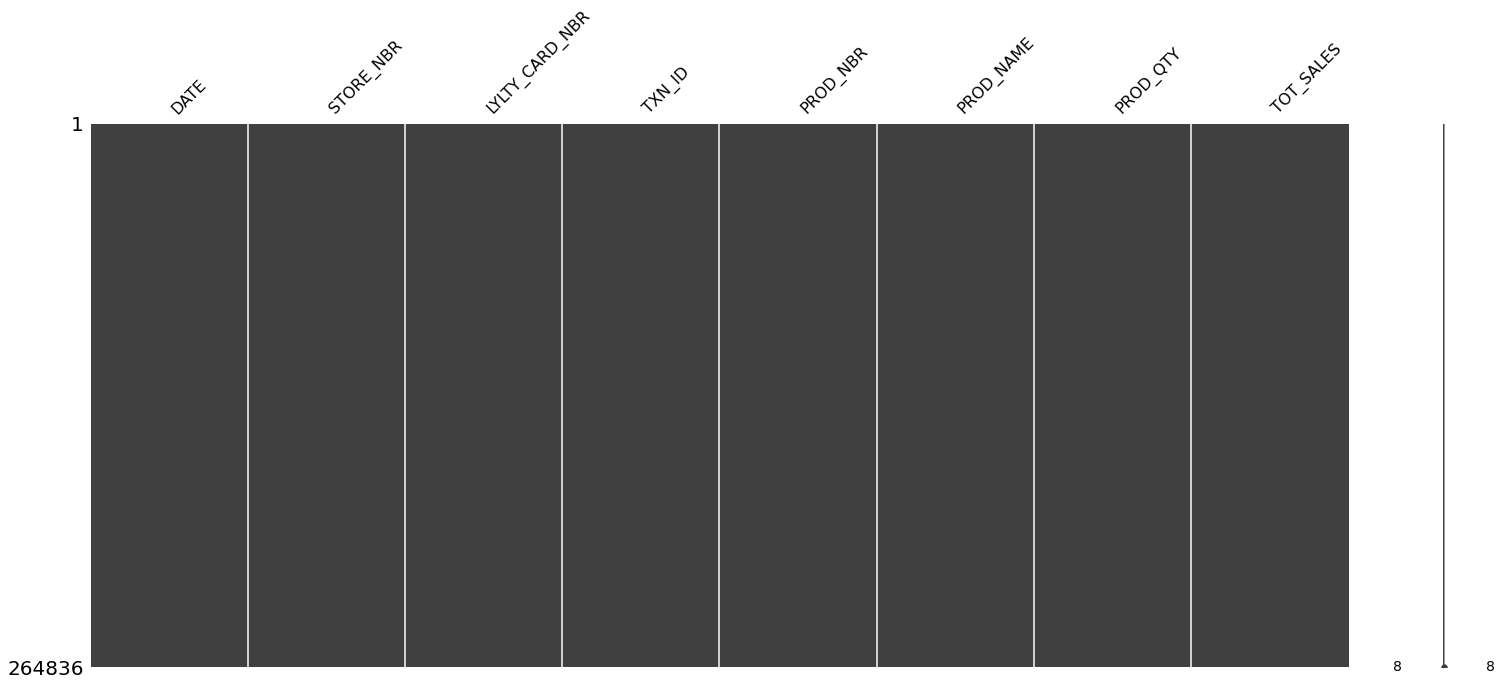

In [85]:
import missingno as msno

msno.matrix(transaction)
plt.show()

No missing values in any column

In [86]:
#Checking for duplicates 
transaction_duplicates= transaction.duplicated(keep=False)
transaction[transaction_duplicates]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [87]:
print ("There are {} duplicate(s) in the transaction dataset.".format(transaction.duplicated().sum()))

There are 1 duplicate(s) in the transaction dataset.


<br/>
Let's check for more duplicates using the subsetting. Are there entries with identical transaction IDs??

In [88]:
transaction[transaction.duplicated(subset=['TXN_ID','DATE','LYLTY_CARD_NBR'])]  

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
...,...,...,...,...,...,...,...,...
264287,2018-11-25,248,248085,250293,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
264318,2019-04-23,248,248338,250624,106,Natural ChipCo Hony Soy Chckn175g,2,6.0
264528,2018-10-03,259,259038,257645,41,Doritos Salsa Mild 300g,2,5.2
264535,2018-09-04,259,259056,257775,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2


In [89]:
transaction.query('TXN_ID == 48887')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60


So, the entries are recored based on different product purchases. Under one txn_id, there are multiple entires without being duplicates.

In [92]:
#Dropping duplicate 
transaction.drop_duplicates(inplace = True)
transaction.shape

(264835, 8)

## Feature Creation - Pack size and Brand

Product Name column a lot of information. Deriving extra features such as packet size and brand name will facilitate the analysis.

In [95]:
#Extracting the numeric information from Product name column

transaction["Chips Weight(in g)"] = transaction["PROD_NAME"].str.replace(r'\D+', '').astype('int')


C:\Users\debad\AppData\Local\Temp\ipykernel_17348\3909537167.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction["Chips Weight(in g)"] = transaction["PROD_NAME"].str.replace(r'\D+', '').astype('int')


#### Collapsing the Chips Weight category into Pack Sizes 

<img src = "https://img.freepik.com/free-vector/realistic-chips-package_1284-34786.jpg?w=740&t=st=1681146250~exp=1681146850~hmac=45619af9e5437dffaf8691d2611e553d56f51ffe57ed6b57477d662ffb284b85" style="width:100px; float : left"> 
     
    * Small - 70g to 100g
    * Medium - 100g to 175g
    * Large - 175g to 250g
    * Party - 250g to 380g

In [150]:
transaction['Chips Weight(in g)'].unique()

ranges = [0,100,175,250,380]
labels = ['Small','Medium','Large','Party']
transaction['Pack_size'] = pd.cut(transaction['Chips Weight(in g)'], bins=ranges,
labels=labels)

In [97]:
transaction[['BRAND','WEIGHT']] = transaction['PROD_NAME'].str.split('\d\Sg', expand=True)

In [98]:
transaction["BRAND"] = transaction["BRAND"].str.replace(r'\d+', '')
transaction.drop(['WEIGHT'], axis=1, inplace= True)

C:\Users\debad\AppData\Local\Temp\ipykernel_17348\1018614195.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction["BRAND"] = transaction["BRAND"].str.replace(r'\d+', '')


In [151]:
transaction.sample(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size
195127,2018-12-17,138,138075,140954,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,Old El Paso Salsa Dip Tomato Mild,Party
120988,2019-01-18,49,49308,45811,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,Kettle Tortilla ChpsBtroot&Ricotta,Medium
7067,2019-03-31,41,41073,37995,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural Chip Co Tmato Hrb&Spce,Medium
70739,2019-05-23,28,28110,25184,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70,Infuzions Mango Chutny Papadums,Small


## Customer Dataset

In [100]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<b>LIFESTAGE:</b> Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school. </br>
<b>PREMIUM_CUSTOMER:</b> Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [120]:
# Changing the data types to more appropriate ones
customer.LIFESTAGE = customer.LIFESTAGE.astype("category")
customer["PREMIUM_CUSTOMER"] = customer["PREMIUM_CUSTOMER"].astype("category")

<AxesSubplot:>

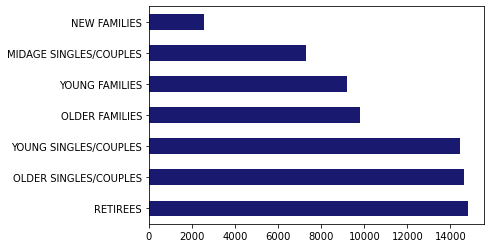

In [104]:
customer["LIFESTAGE"].value_counts().plot(kind='barh', color ='midnightblue')

In [121]:
customer["PREMIUM_CUSTOMER"].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
# check for outliers via histograms, scatter plots, box-plots.

## Merging the datasets

In [202]:
data = transaction.merge(customer, on= "LYLTY_CARD_NBR" , how='left')
data.sample(5)
data.shape

(264835, 13)

In [203]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt,Medium,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho Cheese,Medium,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken,Medium,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,Medium,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,Medium,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle Sweet Chilli And Sour Cream,Medium,YOUNG SINGLES/COUPLES,Premium
264831,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos Splash Of Lime,Medium,YOUNG SINGLES/COUPLES,Premium
264832,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos Mexicana,Medium,YOUNG SINGLES/COUPLES,Premium
264833,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos Corn Chip Mexican Jalapeno,Medium,YOUNG SINGLES/COUPLES,Premium


In [155]:
data.isna().sum()

DATE                  0
STORE_NBR             0
LYLTY_CARD_NBR        0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY              0
TOT_SALES             0
Chips Weight(in g)    0
BRAND                 0
Pack_size             0
LIFESTAGE             0
PREMIUM_CUSTOMER      0
dtype: int64

In [157]:
data[data.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size,LIFESTAGE,PREMIUM_CUSTOMER


After cleaning, preparation and merging, the final dataset is obtained. 👍

## Let's do some exploratory data analysis now!

We will do bit of a univariate analysis first to answer some simple questions first. 📊 📈 📉
 * What has been the general trend of sales? Which months saw more sales than usual?
 * On average, how man packets of chips does a customer buy?
 * Which Brand and pack size is more popular?
 * Which category of customers contribute to most sales?





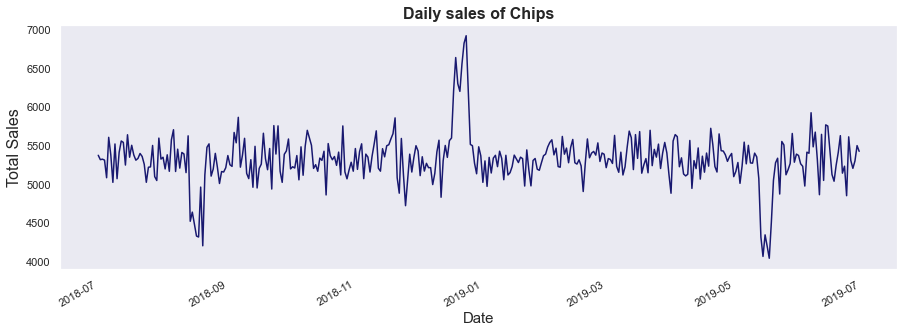

In [159]:
plt.figure(figsize=(15,5))
sns.set()
sns.set_style('dark')

daily_sales = transaction.groupby(['DATE'])['TOT_SALES'].sum().plot(kind='line', color= 'midnightblue')


plt.xlabel('Date',size= 15)
plt.ylabel('Total Sales',size= 16)
plt.title( 'Daily sales of Chips', size= 16, weight= 'bold')
plt.show()


In [25]:
daily_sales.sort_values(ascending= False)

DATE
2018-12-24    6923.00
2018-12-23    6826.00
2018-12-19    6639.80
2018-12-22    6558.70
2018-12-20    6300.80
               ...   
2019-05-14    4310.45
2018-08-20    4198.20
2019-05-17    4192.45
2019-05-15    4060.30
2019-05-18    4036.50
Name: TOT_SALES, Length: 364, dtype: float64

<i> Looks like the store sold most chips on Christmas Eve of 2018! Nice. </br>
 And, the least amount of sales was 18th May, 2019. </i>
 
 ### Which pack is chosen more?

In [160]:
data['Chips Weight(in g)'].describe()

count    264835.000000
mean        182.427032
std          64.327316
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: Chips Weight(in g), dtype: float64

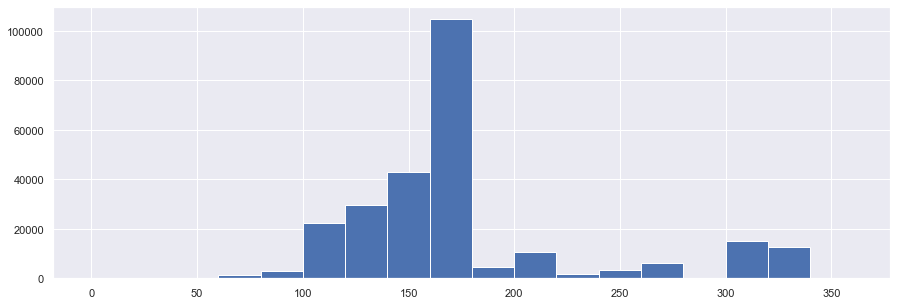

In [165]:
plt.figure(figsize=(15,5))
data['Chips Weight(in g)'].hist(bins = range(0,380,20))
plt.show()

<AxesSubplot:>

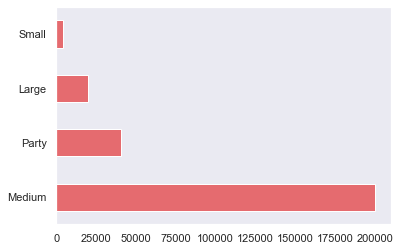

In [170]:
data['Pack_size'].value_counts().sort_values(ascending = False).plot(kind='barh', color= '#E56B6F')

So, the medium sized packs sell the most. Followed by part packs. 

### Let's talk Brand & flavour... 

In [173]:
#Top 10 highest selling chips in one year
data["BRAND"].value_counts().sort_values(ascending= False).head(5)

Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
Name: BRAND, dtype: int64

Kettle and Cobs for the win! With Tyrrells ofc. 

### Looking at total sales : factors which were drivers of sales?

In [174]:
transaction[transaction["TOT_SALES"]==transaction["TOT_SALES"].max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito Corn Chp Supreme,Party
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito Corn Chp Supreme,Party


The same customer purchasing huge amounts of the same product once a year.This does not seem like a normal buying beahviour but rather a commercial purchase. We will consider this an outlier.

In [199]:
daily_sales_packsize = transaction.groupby(['Pack_size', 'BRAND'])['TOT_SALES'].sum()\
                  
print(daily_sales_packsize.sort_values(ascending= False).head(10))

Pack_size  BRAND                               
Party      Dorito Corn Chp     Supreme             40352.0
           Smiths Crnkle Chip  Orgnl Big Bag       36367.6
           Smiths Crinkle Chips Salt & Vinegar     34804.2
Medium     Kettle Mozzarella   Basil & Pesto       34457.4
Party      Smiths Crinkle      Original            34302.6
           Cheezels Cheese                         34296.9
           Doritos Cheese      Supreme             33390.6
Medium     Kettle Sweet Chilli And Sour Cream      33031.8
           Kettle Original                         32740.2
           Kettle Sea Salt     And Vinegar         32589.0
Name: TOT_SALES, dtype: float64


Among the significant drivers of total sales were the medium and party packs of Dorito, Smiths, Kettle and Cheezels! 

In [217]:
outliers = data[data["TOT_SALES"] == 650]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito Corn Chp Supreme,Party,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Dorito Corn Chp Supreme,Party,OLDER FAMILIES,Premium


In [237]:
data.drop(outliers.index,inplace= True)


KeyError: '[69762, 69763] not found in axis'

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Chips Weight(in g),BRAND,Pack_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt,Medium,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho Cheese,Medium,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken,Medium,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip Thinly S/Cream&Onion,Medium,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,Medium,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle Sweet Chilli And Sour Cream,Medium,YOUNG SINGLES/COUPLES,Premium
264831,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos Splash Of Lime,Medium,YOUNG SINGLES/COUPLES,Premium
264832,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos Mexicana,Medium,YOUNG SINGLES/COUPLES,Premium
264833,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos Corn Chip Mexican Jalapeno,Medium,YOUNG SINGLES/COUPLES,Premium


## Analysis

We will do some additional exploration on questions like:
<br>
 * Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is
 * How many customers are in each segment
 * How many chips are bought per customer by segment
 * What’s the average chip price by customer segment

### Which segment of customers by lifestage and purchasing behaviour, are dominant?
 Examining the constitution of total unique customers in each segment.

In [268]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index= False)['LYLTY_CARD_NBR']\
    .agg({'Total Number':'nunique'})\
    .sort_values(by= 'Total Number',ascending= False)\
    .head(5)
  

,LIFESTAGE,PREMIUM_CUSTOMER,Total Number
19,YOUNG SINGLES/COUPLES,Mainstream,8088
13,RETIREES,Mainstream,6479
10,OLDER SINGLES/COUPLES,Mainstream,4930
9,OLDER SINGLES/COUPLES,Budget,4929
11,OLDER SINGLES/COUPLES,Premium,4750


<b>Top 5 prevalent sections of customer base<b/> ☝️
 
 Mainstream young singles/couples and mainstream retirees buy the most chips. Great. But budget older singles/couples have also made the list. Do these customer segments drive the most sales? We will find that by analysing expenditures.

### Which segment of customer spends the most on chips? 

In [219]:
data.PREMIUM_CUSTOMER.value_counts()

Mainstream    101988
Budget         93157
Premium        69688
Name: PREMIUM_CUSTOMER, dtype: int64

In [229]:
data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        676211.55
Mainstream    750744.50
Premium       506152.95
Name: TOT_SALES, dtype: float64

In [269]:
sales_by_customer=data.pivot_table(values= "TOT_SALES", index= "LIFESTAGE", columns= "PREMIUM_CUSTOMER",aggfunc='sum')
sales_by_customer

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,35514.80,90803.85,58432.65
NEW FAMILIES,21928.45,17013.90,11491.10
OLDER FAMILIES,168363.25,103445.55,80658.40
OLDER SINGLES/COUPLES,136769.80,133393.80,132257.15
RETIREES,113147.80,155677.05,97646.05
YOUNG FAMILIES,139345.85,92788.75,84025.50
YOUNG SINGLES/COUPLES,61141.60,157621.60,41642.10


<Figure size 1440x720 with 0 Axes>

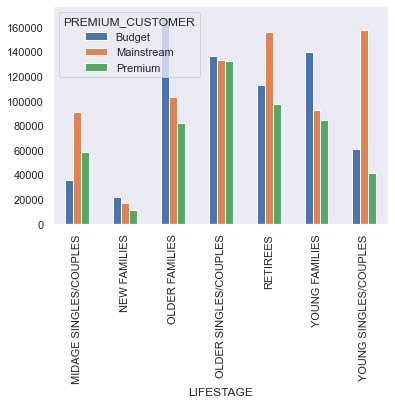

In [231]:
plt.figure(figsize=(20,10))
figure =sales_by_customer.plot(kind='bar')

Budget customers belonging to older familes contribute the most to the total chips sales, followed by mainstream young singles/couples and mainstream retirees. <br/>
Mainstream customers mostly belong to retirees and young singles/ couples. Majority of premium customers belong to older singles/couples. New families, of any spending pattern, spend the least on chips.

### Average Quantity of Chips bought per customer

In [271]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index= False)['PROD_QTY']\
    .agg({'Avg Qnty Bought':'mean'})\
    .sort_values(by= 'Avg Qnty Bought',ascending= False).head(5)
  

,LIFESTAGE,PREMIUM_CUSTOMER,Avg Qnty Bought
7,OLDER FAMILIES,Mainstream,1.948610
6,OLDER FAMILIES,Budget,1.945812
8,OLDER FAMILIES,Premium,1.945576
15,YOUNG FAMILIES,Budget,1.940749
16,YOUNG FAMILIES,Mainstream,1.940342


Older families and young families in general buy more chips per customer.


 <div style="background-color: #F7E8E8; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;"> <b>Conclusion📑</b> <br/>
 
     More in numbers -> Mainstream young singles/couples and mainstream retirees
     Buy more packets of chips ->  Older families and young families 
     Spend the most on chips -> Budget older familes, mainstream young singles/couples and mainstream retirees.

 </div>


#### The  budget older families segment of the customer base spends the most on chips, we will analyse their purchase behaviour more closely.

In [286]:
older_budget = data.query('LIFESTAGE == "OLDER FAMILIES" & PREMIUM_CUSTOMER == "Budget"')

older_budget.groupby(['BRAND', 'Pack_size'], as_index = False)['PROD_QTY'].sum()\
            .sort_values(by='PROD_QTY',ascending= False)\
            .head(5)

,BRAND,Pack_size,PROD_QTY
133,Kettle Mozzarella Basil & Pesto,Medium,561
311,Smiths Crinkle Chips Salt & Vinegar,Party,559
61,Doritos Corn Chips Cheese Supreme,Medium,558
381,Thins Potato Chips Hot & Spicy,Medium,549
402,Twisties Cheese Burger,Large,544


Kettle Chips are the most popular brand, whch drive the most sales. 